In [19]:
import os
import sys
sys.path.append(os.path.abspath('..'))
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from inference.attractant_inference import AttractantInferer, observed_bias
from in_silico.sources import CellsOnWoundMargin, PointWound, CellsInsideWound
from utils.distributions import Normal

In [20]:
out1WT = np.load('../data/AttractantInferenceWTUniformPrior.npy')
out1Mut = np.load('../data/AttractantInferenceMutantUniformPrior.npy')
def Bias_persistance(x,y):
    Dataset = np.load('../data/np_array/WB total WT-{}{}.npy'.format(x,y))
    W = Dataset[:,0]
    B = Dataset[:,2]
    OB = (W * B)
    mean = np.mean(OB,axis=0)
    std = np.std(OB,axis=0)

    return mean,std


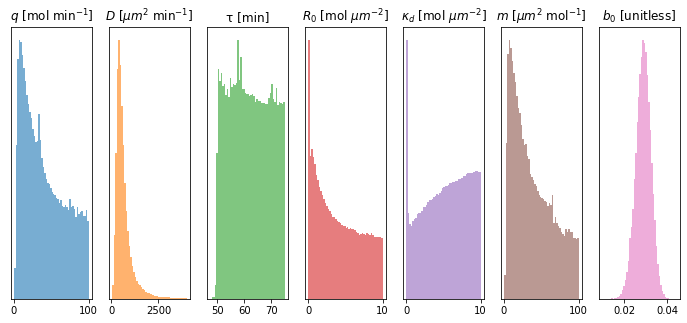

In [22]:

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(12, 5), sharex='col')
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']

names = ['$q$ [mol min$^{-1}$]', '$D$ [$\mu m^{2}$ min$^{-1}$]', 'τ [min]', '$R_0$ [mol $\mu m^{-2}$]', '$\kappa_d$ [mol $\mu m^{-2}$]', '$m$ [$\mu m^{2}$ mol$^{-1}$]', '$b_0$ [unitless]']
names1 = ['q', 'D', 'τ', 'R_0', 'kappa_d', 'm', 'b_0']

for j in range(7):
    axes[j].set_title(names[j])
    axes[j].set_yticks([])
    axes[j].hist(out1Mut[:, j], bins=50, color=cols[j], alpha=0.6, density=True)#),label='{} mean = {:.2f} $\pm$ {:.2f}'.format(names1[j],mean[j], std[j]))







/Users/danieltudor/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


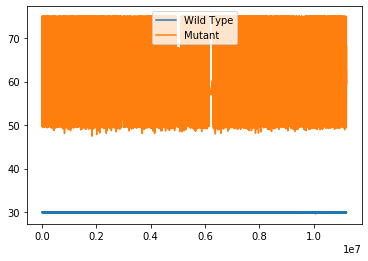

In [38]:
plt.plot(out1WT[:,2], label="Wild Type")
plt.plot(out1Mut[:,2], label="Mutant")
plt.legend()

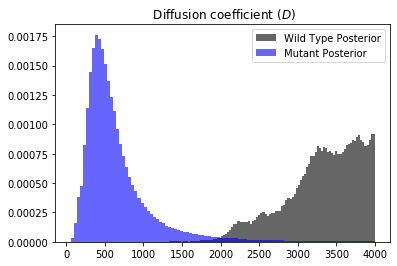

ModeResult(mode=array([3998.84656976]), count=array([560]))

In [25]:
#plt.hist(out1WT[:,2],bins=100,alpha=0.6,density=True,color='r',label="WT")

plt.hist(out1WT[:,1],bins=100,alpha=0.6,density=True,color='k',label ="Wild Type Posterior")
plt.hist(out1Mut[:,1],bins=100,alpha=0.6,density=True,color='b',label ="Mutant Posterior")


#plt.plot([48, 48], [0, 0.05], 'g-', lw=2)

plt.title(" Diffusion coefficient ($D$) ")
plt.legend()
plt.show()
import scipy.stats as stats
stats.mode(out1WT[:,1])
#plt.savefig("../data/Diffusion coefficient.png")

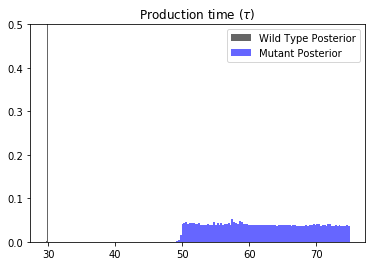

<Figure size 432x288 with 0 Axes>

In [36]:
plt.hist(out1WT[:,2],bins=100,alpha=0.6,density=True,color='k',label ="Wild Type Posterior")
plt.hist(out1Mut[:,2],bins=100,alpha=0.6,density=True,color='b',label ="Mutant Posterior")

max(out1Mut[:,2])
#plt.plot([48, 48], [0, 0.05], 'g-', lw=2)
plt.ylim(0,0.5)
plt.title("Production time ($\\tau$) ")
plt.legend()
plt.show()
plt.savefig("Tau.png")

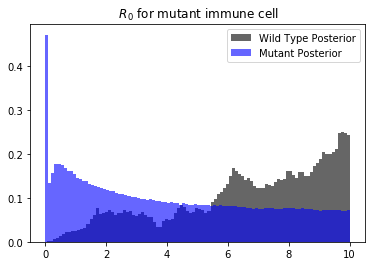

<Figure size 432x288 with 0 Axes>

In [29]:
plt.hist(out1WT[:,3],bins=100,alpha=0.6,density=True,color='k',label ="Wild Type Posterior")
plt.hist(out1Mut[:,3],bins=100,alpha=0.6,density=True,color='b',label ="Mutant Posterior")


#plt.plot([48, 48], [0, 0.05], 'g-', lw=2)

plt.title(" $R_0$ for mutant immune cell")
plt.legend()
plt.show()
plt.savefig("R0.png")

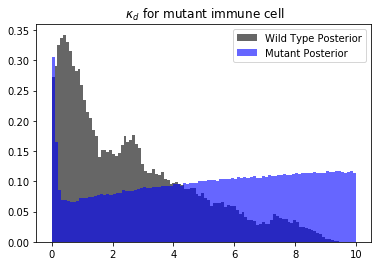

<Figure size 432x288 with 0 Axes>

In [30]:
plt.hist(out1WT[:,4],bins=100,alpha=0.6,density=True,color='k',label ="Wild Type Posterior")
plt.hist(out1Mut[:,4],bins=100,alpha=0.6,density=True,color='b',label ="Mutant Posterior")

#plt.plot([48, 48], [0, 0.05], 'g-', lw=2)

plt.title(" $\kappa_d$ for mutant immune cell")
plt.legend()
plt.show()
plt.savefig("Kappa d.png")


In [ ]:
import seaborn as sns
D = out1Mut[:,1]
tau = out1Mut[:,2]
ax1 = sns.jointplot(D,tau,kind="kde",color='r')
ax1.set_axis_labels(xlabel='D', ylabel='$\\tau$', size ='large')